
<h1 align="center">  Restaurant and Coffee House Chains in TORONTO </h1>

<h2 align="center"> Applied Data Science Capstone by IBM/Coursera (Final Report) </h2>

<h4 align="center">  </h4>

<h4 align="center"> Author: Andrei Borodich </h4>

<h4 align="center"> Date: 12-MAR-2020 </h4>

<h4 align="center">  </h4>




The **report** URL to the Jupyther notebook at GitHub <br>
https://github.com/and44bor/Coursera_Capstone/blob/master/RBI--report.ipynb

The **report** URL to the rendered html-page at GitHub, e.g. **a blog presentation** <br>
https://htmlpreview.github.io/?https://github.com/and44bor/Coursera_Capstone/blob/master/RBI--report.html

The **code** URL to the Jupyther notebook at GitHub <br>
https://github.com/and44bor/Coursera_Capstone/blob/master/RBI--code.ipynb

The **code** URL to the rendered html-page at GitHub <br>
https://htmlpreview.github.io/?https://github.com/and44bor/Coursera_Capstone/blob/master/RBI--code.html


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)



## Introduction: Business Problem <a name="introduction"></a>

In this project we explore the West End and East End of the *City of Toronto* in order to find attractive locations to open a few food venues that are members of different franchises though running by the same management company. 
Specifically, this report will cover business planning issues pertinent to the fast-food chain companies. 
he management companies like the **Restaurant Brands International Inc. (RBI)** show their  interest to this type of research analytics. Because it provides a scientific, grounded on data, approach to estimate the optimal location for their particular brand. 

The case description may look as it follows. 
The RBI which is a Canadian multinational fast-food holding company, owns  American fast-food restaurant chain  *Burger King* and Canadian coffee shop chain *Tim Hortons*. Relaying on marketing data, the management promotes opening a few franchisees in the "Low Venue Density" neighborhoods of Toronto that are predominantly located in the two boroughs, *Scarborough* (East End) and *Etobicoke* (West End) of the city.   
The task is to locate particular neighborhoods having the high affinity to the fast-food venues. Then, identify those that are more suitable for opening a new **fast-food restaurant (Burger King)** and other for  opening a new **coffee shop (Tim Hortons)**. 

We will be using the Foursquare location data to create datasets of neighborhood venues. We will explore a given borough and segment it with the pandas dataframe utilities and methods.   
The descriptive statistics applied to the datasets will help to find the locations of high popularity of the **fast-food restaurants (FFRs)** and **coffee shops (CSs)**. 
The k-Means  Clustering  Method  will be run on the neighborhood--venue data and group the neighborhoods based on  similarity of their venue features.   
We will provide a list of particular locations of the high affinity to the fast-food venues and discuss their suitability to open either a new FFR or CS.



## Data <a name="data"></a>

We begin with creating a representative dataset with the Toronto neighborhood geospatial data. 
The City of Toronto is divided into 6 districts (boroughs). 
They are Old Toronto (Downtown, Midtown and Islands), York, East York, North York, Scarborough and Etobicoke. 
In the previous work, "*Segmenting and Clustering Neighborhoods in Toronto*", we have created 2 dataframes with the boroughs' and neighborhoods' features and stored the datasets into 2 csv-files. 

One stored dataset contains the names of neighborhoods combined under the same postal codes. 
It was obtained by making calls to the reliable web-site and fetching the html-table from the Toronto web-page into a pandas dataframe.
We have used the `lxml`  Python library to do a web-site scraping.

Other stored dataset contains the geographical coordinates of combined neighborhoods. 
It was obtained by retrieving  CanadaPost's geocoded data from the postal codes.
We have used the `geocoder` Python library to get the geospatial coordinates of combined neighborhoods linked to the postal codes. 

With the 2 available datasets, we create a combined dataframe of the Toronto neighborhoods including features as name, borough label, latitude, longitude and postal code affiliation. 
From that dataframe we make the two reduced ones for two boroughs, *Scarborough* and *Etobicoke*. Those dataframes, `scarbo_data` and `etobi_data`, are output below.


In [83]:
scarbo_data.head(5)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [84]:
etobi_data.head(5)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M8V,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
3,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509
4,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",43.628841,-79.520999


There are **17 combined neighborhoods** in the **Scarborough** borough. 

There are **11 combined neighborhoods** in the **Etobicoke** borough. 

We also draw the map of each borough and add neigborhood locations onto the map. 
The maps were made with a rendering library `Folium`, which is a highly acknowledged visualization library. The Folium maps are easy to navigate and fast to respond zooming. 
The nominal geospatial coordinates (latitude and longitude) of Scarborough, ON and Etobicoke, ON were obtained with the geolocator API of the geolocation service `Nominatim` from the GeoPy library.

Then, we proceed with creating datasets of the **neighborhood most popular venues**, one for Scarborough and other for Etobicoke.
We explore neighborhoods in a given borough utilizing the `Foursquare` API. By making calls we get the top popular venues, with the limit of 100,  in all categories, within a radius of 1250 meters around every neighborhood. As we empirically determined it is an optimal radius for a bigger circular coverage but fewer venue overlap in case of the "low venue density" neighborhoods of Toronto. 
We collect results and extracts the venue features from the json-structure. 
We check the venues counted more than once, because of searching circle overlap, retain the proper venue IDs and discard their duplicates. 
Hence, we create two datasets of neighborhood venues for the two boroughs, Scarborough and Etobicoke. 
Those dataframes, `scarbo_venues ` and `etobi_venues `, are output below. 
We visualize the venue locations on the borough's maps. 


In [85]:
scarbo_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,579a91b3498e9bd833afa78a,43.802008,-79.198080,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Harvey's,4b6718c2f964a5203f3a2be3,43.800020,-79.198307,Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,4bb6b9446edc76b0d771311c,43.807448,-79.199056,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,4b914562f964a520d4ae33e3,43.798558,-79.195777,Caribbean Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Staples Morningside,4bcb612d3740b713f0606265,43.800285,-79.196607,Paper / Office Supplies Store


In [86]:
etobi_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,LCBO,4b119977f964a520488023e3,43.602281,-79.499302,Liquor Store
1,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Huevos Gourmet,5395d784498e085ff3c18198,43.601188,-79.503717,Mexican Restaurant
2,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Sweet Olenka's,4c081867ffb8c9b6d7b66761,43.601099,-79.500325,Dessert Shop
3,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Kitchen on 6th,571cdf3e38faaa76e74049d7,43.601396,-79.504563,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Cellar Door Restaurant,53938d4c498ea919cfa0117f,43.600221,-79.507638,Italian Restaurant


There are **527 popular venues** collected in **Scarborough**; they are placed at `scarbo_venues ` dataset. 


There are **363 popular venues** collected in the **Etobicoke**; they are placed at `etobi_venues ` dataset. 


Then, we proceed with creating datasets of the **neighborhood particular category venues**, as FFR and CS, in  Scarborough and Etobicoke.
Again, we utilize the `Foursquare` API. We get only FFRs and CSs, each category having the limit of 100,  within a radius of 1250 meters around every neighborhood. 
After extracting venue features from the json-structure and discarding the venue duplicates  we create four more datasets.  
Those dataframes, `df_FFRs `  &  `df_CSs ` for Scarborough  and `df_FFRe `  &  `df_CSe ` for Etobicoke are output below. 
We visualize the venue locations on the borough's maps. 

In [87]:
df_FFRs.head(5) 
# df_CSs.head(5) 

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
0,1,579a91b3498e9bd833afa78a,Wendy's,43.802008,-79.198080,"8129 Sheppard Avenue, Scarborough ON M1B 6A3",4bf58dd8d48988d16e941735,fast food restaurant
1,1,4bb6b9446edc76b0d771311c,Wendy's,43.807448,-79.199056,Toronto ON,4bf58dd8d48988d16e941735,fast food restaurant
2,1,4b89abadf964a520ae4a32e3,Quiznos,43.798773,-79.196556,"875 Milner Ave (at Morningside Ave), Toronto O...",4bf58dd8d48988d16e941735,fast food restaurant
3,1,4c3660c80a71c9b6d30f3dc9,McDonald's,43.798261,-79.201449,"785 Milner Avenue (Walmart), Scarborough ON M1...",4bf58dd8d48988d16e941735,fast food restaurant
4,3,4b9023e9f964a5200e7833e3,McDonald's,43.768334,-79.188288,"4435 Kingston Rd. (Lawrence Ave E), Scarboroug...",4bf58dd8d48988d16e941735,fast food restaurant


In [88]:
# df_FFRe.head(5) 
df_CSe.head(5)

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
0,1,5086d512e4b0aafd9871629f,Tim Hortons,43.598932,-79.511990,"3089 Lakeshore Blvd (Lakeshore), Etobicoke ON ...",4bf58dd8d48988d1e0931735,coffee shop
1,1,4f0c86b7e4b0d563f7dd6e9c,Coffee Time,43.602284,-79.499857,"2786 Lake Shore Blvd W (at 2nd St), Toronto ON",4bf58dd8d48988d1e0931735,coffee shop
2,1,4be6c47a2457a593101cad15,Big Guy's Little Coffee Shop,43.601359,-79.502480,"2861 Lakeshore Blvd W, Toronto ON",4bf58dd8d48988d1e0931735,coffee shop
3,2,52abc3b011d279cc571a9e77,Starbucks,43.594427,-79.533384,"3559 Lake Shore Blvd W (Thirty Third St), Toro...",4bf58dd8d48988d1e0931735,coffee shop
4,2,55e4f8ee498e1696f68060e8,Tim Hortons,43.592881,-79.539087,"3719 Lakeshore Blvd West, Etobicoke ON M8W 1P8",4bf58dd8d48988d1e0931735,coffee shop


There are **61 fast-food restaurants** and **46 coffee shops** collected in **Scarborough**; 
they are placed at `df_FFRs `  &  `df_CSs `.


There are **21 fast-food restaurants** and **38 coffee shops** collected in **Etobicoke**; 
they are placed at `df_FFRe `  &  `df_CSe `. 

## Methodology and Analysis  <a name="methodology"></a>

#### All Venue Categories &mdash; Cluster Analysis

We aim to identify the similar neighborhoods, based on similarity of their venue features.
In other words, we are going to apply  some clustering method to our two neighborhood--venue datasets, Scarborough and Etobicoke.
Clustering algorithms are unsupervised process (learning) to group unlabeled data, based on the similarity of their features.
**The k-Means clustering** algorithm is one of them being the well-documented and implemented in most machine-learning libraries.

In short, the algorithm attempts to split a given data set into a fixed number (k) of non-overlapping clusters, e.g. it performs Partitional Clustering.
The objectives of this method are to form clusters in such a way that similar samples go into a cluster, and dissimilar samples fall into different clusters.
The algorithm does this by minimizing the "intra-cluster" distances and maximizing the "inter-cluster" distances.
The k-Means clustering algorithm comes in several different implementations depending on the computational designs.

We made our preference toward the **Mini-Batch k-Means** method.
The main idea behind this algorithm is to use small random batches of data of a fixed size, so they can be stored in memory.
Each iteration a new random batch from the dataset is obtained and used to update the clusters and this is repeated until convergence.
Every data object in the batch is assigned to one of the clusters, depending on the previous locations of the cluster centroids.
Updating the locations of cluster centroids is based on the new data object from the batch.
The update is a gradient descent update, which is significantly faster than a regular batch k-Means update.

Pre-processing the data before fitting them to the clustering model has been completed as follows.

(1)
Create a bigger size dataset which is an extension of the borough venue set and includes additional columns, each representing a unique venue category counted for this dataset.

There are **132 unique** venue categories in the **Scarborough** venue dataset comprising the collected **527 popular** venues.
We create a dataframe (527 x 132) representing those 132 categories, specifically, showing their occurrence frequencies in the 527 venue set.

There are **110 unique** venue categories in the **Etobicoke** venue dataset comprising the collected  **363 popular** venues.
We create a dataframe (363 x 110) representing those 110 categories, specifically, showing there occurrence frequencies in the 363 venue set.

(2)
Group a bigger size dataset by neighborhoods.

Since we look for similarity/dissimilarity of neighborhoods based on their popular venues,
we have to have a 17 row dataframe corresponding to **17 neighborhoods in Scarborough**;  each neighborhood is featured by the venue category frequencies (totally, 132 categories).
Similarly, we also an 11 row dataframe corresponding to **11 neighborhoods in Etobicoke**;  each neighborhood is featured by the venue category frequencies (totally, 110 categories).

(3)
Normalize a bigger size dataset.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem.
So, we normalize the data, e.g. *standardize the features* by removing the mean and scaling to unit variance.

Then, we run  `MiniBatchKMeans` application from the Python machine-learning library `scikit-learn`.

The number of clusters for each borough dataset has been selected using the "elbow method" and
its optimal value of **6 clusters** has been confirmed in further calculations for both Scarborough and Etobicoke.

Fitting our datasets to the clustering model has been completed successfully, e.g. the clusters have been separated while the iterations converged,  for each borough.
The  `MiniBatchKMeans` output includes the cluster labels, one for each neighborhood, that show how many neighborhoods made every of 6 clusters.

First, the K-Means model segmented the **Scarborough neighborhoods** into 
a 9 member cluster (labeled by 0), a 4 member cluster (labeled by 2) and 
four sole clusters (labeled by 1, 3, 4 and 5).

Second, the K-Means model clustered the **Etobicoke neighborhoods** into 
a 5 member cluster (labeled by 5), a 2 member cluster (labeled by 2)  and 
four sole clusters (labeled by 0, 1, 3 and 4).

We can evaluate the quality of our clusters using the evaluation metrics.
The two of them have been called in this study.

The **Cluster Inertia** is defined as the sum of distances of all the points within a cluster from the centroid of that cluster.
So, inertia gives the sum of intra-cluster distances. 
A cluster formation requires the distances between its members to be as small as possible.
Hence, *the lesser the inertia value, the better (more compact) our clusters*.

The **Davies-Bouldin score** is defined as the average ratio of intra-cluster distances to inter-cluster distances.
Each ratio is a similarity measure of each cluster with its most similar cluster.
Hence, *clusters which are farther apart and less dispersed will result in a better score*.
The minimum score is zero, with lower values indicating better clustering.

Thus, *Inertia quantifies the cluster distortion* while *the Davies-Bouldin score estimates the cluster dissimilarity*.

Referring to two our dataframes,
the clustering model of the **Scarborough** neighborhoods data is quantified by the numbers of 
*Inertia_score = 1346* and *Davies_Bouldin_score = 0.67*. 
As for modeling the **Etobicoke** neighborhoods data, the calculated scores are
*Inertia_score = 544* and  *Davies_Bouldin_score = 1.08*. 
In general, these values of evaluation metrics justify that the obtained clusters are meaningful and robust.
This is applied to both boroughs.

Cluster examination and their peculiar attributes are presented and discussed in the following sections.


#### Top 10 Venue Categories &mdash; Correlation Analysis

We aim to check the correlations between neighborhoods' venue category sets.
The reduced dataframe has been prepared, for each borough, to include only top 10 popular venue categories.

We calculate the **Phi Coefficient** and **Cramer's V Correlation**. As known from mathematical statistics, **Phi** is a measure for the strength of an association between two categorical variables in a 2 × 2 contingency table.
It is calculated by taking the chi-square value, dividing it by the sample size, and then taking the square root of this value.
**Cramer's V** is an alternative to Phi in contingency tables bigger than 2 × 2 tabulation.
Both quantities vary between 0 and 1 without any negative values.
Their values close to 0 mean no association; and the value bigger than 0.25 signals a very strong relationship.

We complete the correlation analysis for the 10 features representing **10 categorical  variables**.
Results are presented and discussed in the following sections.


#### Targeted Venue Categories &mdash; Frequency Distribution

Next, we take for analysis other prepared datasets pertinent to the **fast-food restaurants** and **coffee shops**. <br>
There are **61 fast-food restaurants** and **46 coffee shops** collected with Foursquare in Scarborough. <br>
There are **21 fast-food restaurants** and **38 coffee shops** collected with Foursquare in Etobicoke. <br>

A **frequency distribution** is a variable description by a pair of corresponding sets, one is all distinct values in the variable and other is their occurrence numbers (frequencies).
In other words, a frequency distribution tells how frequencies are distributed over values.
Frequency distributions are mostly used for summarizing categorical variables.
The common way to visualize a frequency distribution is making either a bar plot (showing frequencies for distinct values) or
a histogram (showing frequencies for intervals of values).

In the following sections, we will present and discuss frequencies of FFR and CS in neighborhoods of the borough
as well as frequencies of Brand Names in the borough (Scarborough and Etobicoke).


## Results and Discussion <a name="results"></a>

The working Scarborough dataset obtained with `Foursquare` includes **527 venues**
that belong to **132 different venue categories**.
The most popular venues categories and their fractional contributions are shown in the pie chart below.


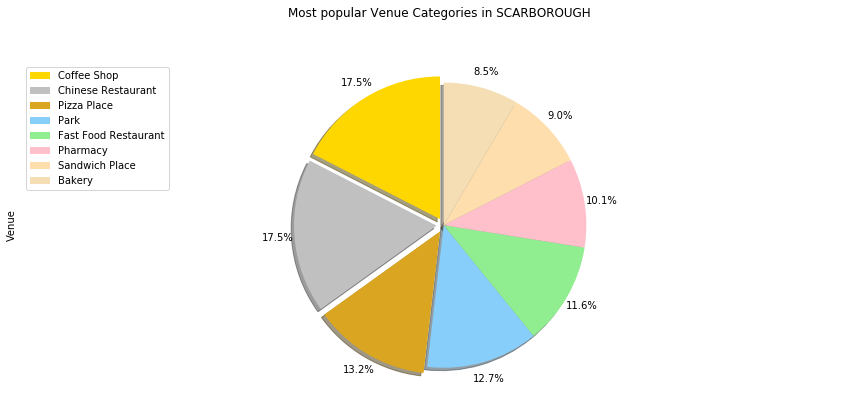


The working Etobicoke dataset obtained with `Foursquare` includes **363 venues** that belong to
**110 different venue categories**.
The most popular venues categories and their fractional contributions are shown in the pie chart below.


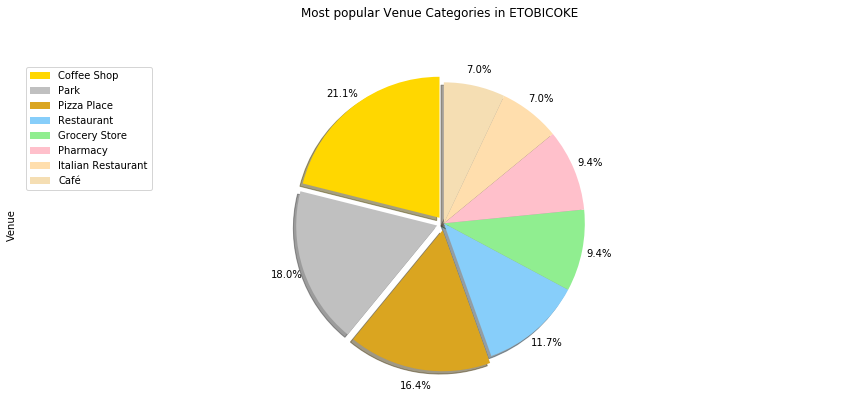


A few observations can be drawn when looking at the pie-charts, namely

1. Food venues are rather popular in neighborhoods in Scarborough and Etobicoke.
2. Coffee Shops make number one position among the top attractive venues in both boroughs.


Next, we display the two dataframes, one for every borough, and examine the top 10 venue categories in each neighborhood.

The *Scarborough* dataset is placed below.

In [102]:
# make a dataframe with top popular venues sorted in decending order, SCARBO
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Park,Pizza Place,Bakery,Caribbean Restaurant,Filipino Restaurant,Bubble Tea Shop,Noodle House,Pool Hall
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Bubble Tea Shop,Dessert Shop,Korean Restaurant,Bakery,Pizza Place,Coffee Shop,Park,Malay Restaurant,Dumpling Restaurant
2,"Birch Cliff, Cliffside West",Park,Skating Rink,Ice Cream Shop,Café,Restaurant,Chinese Restaurant,Thai Restaurant,General Entertainment,Diner,Dessert Shop
3,Cedarbrae,Coffee Shop,Bakery,Gas Station,Pharmacy,Sandwich Place,Indian Restaurant,Wings Joint,Lounge,Chinese Restaurant,Music Store
4,"Clairlea, Golden Mile, Oakridge",Intersection,Park,Coffee Shop,Bus Station,Bakery,Bus Line,Grocery Store,Pharmacy,Fast Food Restaurant,Filipino Restaurant
5,"Clarks Corners, Sullivan, Tam O'Shanter",Fast Food Restaurant,Coffee Shop,Park,Intersection,Sandwich Place,Vietnamese Restaurant,Shopping Mall,Deli / Bodega,Caribbean Restaurant,Pharmacy
6,"Cliffcrest, Cliffside, Scarborough Village West",Park,Harbor / Marina,Ice Cream Shop,Discount Store,Pizza Place,Beach,Burger Joint,Hardware Store,Fast Food Restaurant,Liquor Store
7,"Dorset Park, Scarborough Town Centre, Wexford ...",Coffee Shop,Restaurant,Fast Food Restaurant,Indian Restaurant,Park,Electronics Store,Pizza Place,Asian Restaurant,Furniture / Home Store,Pharmacy
8,"East Birchmount Park, Ionview, Kennedy Park",Coffee Shop,Chinese Restaurant,Discount Store,Grocery Store,Fast Food Restaurant,Bus Line,Burger Joint,Sporting Goods Shop,Pharmacy,Pizza Place
9,"Guildwood, Morningside, West Hill",Pizza Place,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Pharmacy,Shopping Mall,Sandwich Place,Restaurant,Juice Bar,Gym / Fitness Center


In Scarborough, *Coffee Shop and Chinese Restaurant and Park* 
take the first two positions in the list of popularity in the majority of neighborhoods. 
*This is a pattern pertinent specifically for this district*. 

Also, inspecting the dataframe we observe that FFR category shows a firm popularity in neighborhoods. 

If we drop for a moment the recreational category (Park) and then look at the first three positions, 
we notice that Chinese Restaurants compete mostly to FFRs. 


The *Etobicoke* dataset is placed below.

In [159]:
# make a dataframe with top popular venues sorted in decending order, ETOBI
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Bus Line,Indian Restaurant,Fried Chicken Joint,Fast Food Restaurant,Park,Pharmacy,Gym Pool,Sandwich Place
1,"Alderwood, Long Branch",Pharmacy,Coffee Shop,Park,Pizza Place,Discount Store,Grocery Store,Light Rail Station,Convenience Store,Gas Station,Pub
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Convenience Store,Pizza Place,Park,Café,Coffee Shop,Pet Store,Baseball Field,Liquor Store,Fish & Chips Shop,Shopping Mall
3,"Cloverdale, Islington, Martin Grove, Princess ...",Park,Pizza Place,Hotel,Pharmacy,Gym,Grocery Store,Bank,Theater,Fish & Chips Shop,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",Park,Pharmacy,Café,Indian Restaurant,Italian Restaurant,Fried Chicken Joint,Liquor Store,Fast Food Restaurant,Mexican Restaurant,Dessert Shop
5,"Humber Bay, King's Mill Park, Kingsway Park So...",Coffee Shop,Italian Restaurant,Park,Sushi Restaurant,Fast Food Restaurant,Harbor / Marina,Sandwich Place,Ice Cream Shop,Pizza Place,Thai Restaurant
6,"Kingsview Village, Martin Grove Gardens, Richv...",Pharmacy,Liquor Store,Bank,Pizza Place,Beer Store,Coffee Shop,Sandwich Place,Shopping Mall,Café,Gas Station
7,"Kingsway Park South West, Mimico NW, The Queen...",Restaurant,Coffee Shop,Grocery Store,Burrito Place,Sushi Restaurant,Gym,Gym / Fitness Center,Italian Restaurant,Convenience Store,Park
8,Northwest,Coffee Shop,Hotel,Mediterranean Restaurant,Drugstore,Rental Car Location,Restaurant,Dog Run,Gym,Greek Restaurant,Fish & Chips Shop
9,"The Kingsway, Montgomery Road, Old Mill North",Park,Coffee Shop,French Restaurant,Sushi Restaurant,Burger Joint,Breakfast Spot,Spa,Liquor Store,Pizza Place,Pub


In Etobicoke, *Coffee Shop and Pizza Place and Park* 
take the first two positions in the list of popularity in the majority of neighborhoods. 
*This is a pattern pertinent specifically for this district*. 

Also, inspecting the dataframe we observe that FFR category dosn't show a strong popularity in neighborhoods. 

Again, when we drop for a moment the recreational category (Park) and then look at the first three positions, 
we notice that Pizza Places compete with random venues as Cafe, Ethnic Restaurant, FFR, others. 
This is a good sign to open a new FFR franchisee here. 


Next, we look at the correlations between the 1st, 2nd, ..., 10th venue categories in different neighborhoods.
The graphical presentations of **Cramer's V** matrix are placed below for both districts.



| Cramer's V, &nbsp; &nbsp;  Scarbo_Dataset | Cramer's V, &nbsp; &nbsp;  Etobi_Dataset |
| --- | --- | 
| <img src="CramersV--scarbo.png" width="400" align="center"> | <img src="CramersV--etobi.png" width="400" align="center"> |


Looking at the graphics we can notice the following.

1. The 1st and 2nd popular venue categories in all neighborhoods don't correlate, e.g. they are independent observables. This circumstance strengthen grouping the top categories in the previous consideration.

2. In the Scarborough dataset, the 3rd, 4th and 5th category features are strongly correlated. In the Etocoke dataset, a strongly correlated group consists of the 8th, 9th and 10th features.


Next, we examine the clustered neighborhoods in Scarborough and Etobicoke. 

As mentioned previously, the K-Means model segmented the Scarborough neighborhoods into 
2 group clusters (4 members and 9 members) and 4 sole clusters.

As for the Etobicoke neighborhoods, the K-Means model clustered them into 
2 group clusters (5 members and 2 members) and 4 sole clusters.



The *Scarborough* clustered neighborhoods are shown in the map below.

<img src="scarbo_clusters.JPG" align="center">

We visualize the clustered neighborhoods in **Scarborough**. 

**Cluster #0, red** (9 members:  2,4,6,8,9,10,12,14,15)   
This cluster attracts people mostly by its recreational venues as Parks, Scatting Rings, Marina that dominate in popularity.
Here, food venues are mostly represented by Ice Cream Shops and Coffee Shops, in the lesser extent, Pizza Places and some Ethnic Restaurants.
Only a few FFRs can be found in this cluster and their popularity is low.    

**Cluster #1, indigo**   
In fact, this cluster comprises the borough center, with lots of coffee shops and different type of restaurants. 
CSs are rather popular. 
FFRs have average popularity.

**Cluster #2, blue**  (4 members:  3,5,11,16)   
CSs and FFRs are popular in this cluster.
Chinese Restaurants are noticeably less attractive.

**Cluster #3, cyan**   
Chinese Restaurants and Bubble Tea Shops held the high popularity.
Both FFRs and CSs don't attract many people in this area.

**Cluster #4, green**   
Recreational venues, Zoo and Trails, are popular.
FFRs are well represented and popular.

**Cluster #5, orange**   
Chinese Restaurants lead in popularity.
Interesting, that neither CSs nor FFRs come to the top 10 popular venues in this area.


Thus, based on the overall content of the top 10 lists included in the clusters, <br> we can summarize that 
**clusters #2 and #1** seem to have the high affinity, in Scarborough, towards both CSs and FFRs. 
Then, the recreational **clusters #0** demonstrates "the upper middle" affinity. 


The *Etobicoke* clustered neighborhoods are shown in the map below.

<img src="etobi_clusters.JPG" align="center">

We visualize the clustered neighborhoods in **Etobicoke**.

**Cluster #0, red**   
CS and Pizza Place are the most popular venues here.

**Cluster #1, indigo**    
CS and Hotel are the most popular venues here.

**Cluster #2, blue**  (2 members:  2,6)   
Odd venues, Convenience Store and Pharmacy, are the most popular venues here. 
In this cluster, CS and FFR have average popularity and compete with Cafe and Pizza Place. 

**Cluster #3, cyan**   
Restaurant (general category) and Coffee Shop are the most popular venues here.

**Cluster #4, green**    
Pizza Place and Grocery Store are the most popular venues here.

**Cluster #5, orange**  (5 members:  1,3,4,5,9)    
In fact, this cluster comprises  the borough center.
Here, food venues and recreational places make a balance.
Mostly the pair as CS & Park lead the popularity list.
FFRs and Pizza Places are popular as well.


Thus, based on the overall content of the top 10 lists included in the clusters, <br> we can summarize that 
**clusters #2 and #5** seem to have the high affinity, in Etobicoke, towards both CSs and FFRs.


Next, we discuss other datasets that include only targeted venue categories as FFR and CS, in Scarborough and Etobicoke. 

The working Scarborough dataset obtained with `Foursquare` comprises **61 fast-food restaurants** and **46 coffee shops**. 

The working Etobicoke dataset obtained with `Foursquare` comprises **21 fast-food restaurants** and **38 coffee shops**.

Two district datasets are visualized with the bar charts placed below. Each pair of bars corresponds to the particular neighborhood. Number of pairs of bars equals to the number of neighborhoods. 


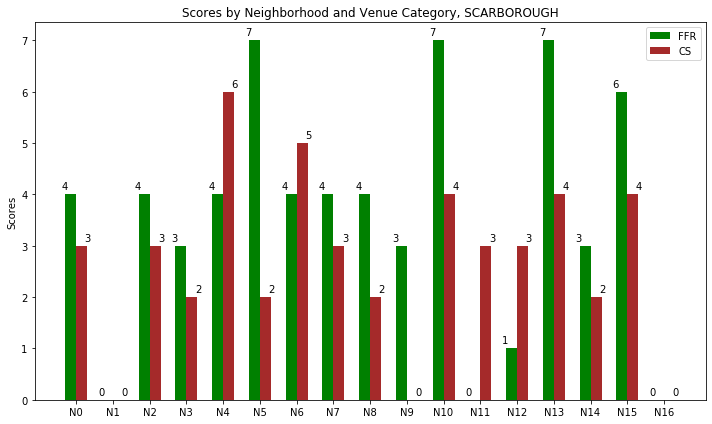

At the Scarborough bar chart **17 neighborhoods** are labeled as N0, N1, ..., N16.


Looking at the Scarborough bar graph we find two neighborhoods, N10 and N13, 
with the highest number of running CSs & FFRs. 
In both places, active FFRs prevail over CSs in number. 

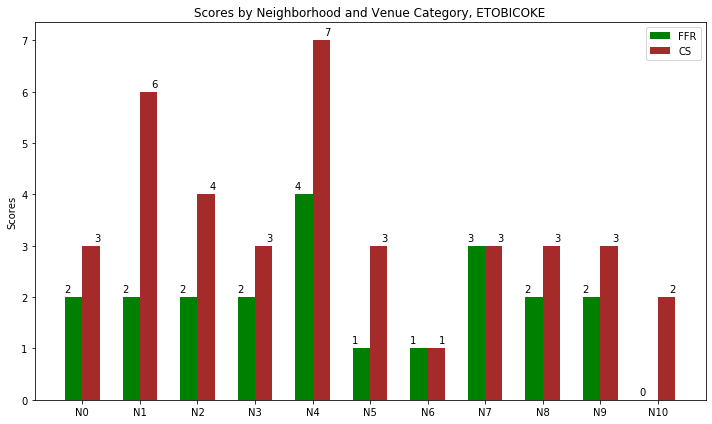

At the Etobicoke bar chart **11 neighborhoods** are labeled as N0, N1, ..., N10.


Looking at the Etobicoke bar graph we find two neighborhoods, N1 and N4, 
with the highest number of running CSs & FFRs. 
In both places, contrary to the Scarborough case, amount of operating CSs exceeds FFRs. 

It is important to underline that the FFR and CS counts in the targeted venue datasets 
essentially exceed those in the popular venue datasets, while all data have been collected with `Foursquare` using the same calling procedure.
The counts of FFRs and CSs in two districts are placed in Tables below, together with the calculated CS/FFR ratios. 
The bigger part of the CSs in operation are well-rated and popular. That is not the case of the FFRs. Only a fraction of the FFRs in operation take their places in the popular venue list. 

<p align="center">Table. SCARBOROUGH.</p>


| popular <br> venue categories |   | popular <br> FFRs | popular <br> CSs |  the FFR <br> venues |  the CS <br> venues |
|  ---|  ---|  ---:|  ---:|  ---:|  ---:| 
| 132 |     | 22   |  33  |  61  |  46  |
|     |  <td colspan=2>popular <br> CS/FFR ratio = 1.50</td> <td colspan=2>operational <br> CS/FFR ratio = 0.75</td>  |  


    
<p align="center">Table. ETOBICOKE.</p>


| popular <br> venue categories |   | popular <br> FFRs | popular <br> CSs |  the FFR <br> venues |  the CS <br> venues |
| :--- | :---: | :---: | :---: | :---: | :---: | 
| 110  |       |  4    |   27  |    21 |    38 |
|      |  <td colspan=2>popular <br> CS/FFR ratio = 6.75</td> <td colspan=2>operational <br> CS/FFR ratio = 1.81</td> | 



From the values in the Scarborough table, we conclude that 
the CS/FFR ratio based on popularity is 1.50 and its remarkably bigger than
the CS/FFR ratio based on operation, which is 0.75.

From the values in the Etobicoke table, we conclude that 
the CS/FFR ratio based on popularity is 6.75 and its remarkably bigger than
the CS/FFR ratio based on operation, which is 1.81. 


Having the results of the cluster analysis 
we can identify the locations suitable for opening new FFRs and CSs. 

In **Scarborough**, in the 9-member `cluster#0` 
the *operational CS/FFR ratio* has its minimal value for N10 and maximal for N12.
Then, in the 4-member `cluster#2` 
the minimal and maximal operational franchise ratio values are for N5 and N3 respectively. <br>
Hence, taking into account the neigborhood similarity, 
**the recommended locations to open new CSs in Scarborough are N10 and N5**, while 
**N12 and N3 are the potential locations to run new FFRs**. 

In **Etobicoke**, in the 5-member `cluster#5` 
the *operational CS/FFR ratio* has its minimal value for N4 and maximal for N5.
Then, in the 2-member `cluster#2` 
the minimal and maximal franchise ratio values are for N6 and N2 respectively. <br>
Hence, taking into account the neigborhood similarity, 
**the recommended locations to open new CSs in Etobicoke are N4 and N6**, while 
**N5 and N2 are the potential locations to run new FFRs**. 


We end the current section with discussion of limitations of this study:

1. We have not pursued the aim to cover most borough territory or account for all existing venues. 
Instead, we decided to collect representative venue statistics withing territorial circles 
centered at the neighborhood centers.  


2. Density population, age distribution and other featured parameters 
that portrait an average customer are not considered. 
Our consideration is based on the customer graded venue popularity data 
and take into account such properties as neighborhood similarity and neighborhood affinity towards CSs and FFRs. 
    
    

## Conclusion <a name="conclusion"></a>



(1) 
The Coffee Shop is the most popular venue category in Scarborough and Etobicoke. 
Also most neighborhoods in both boroughs show a high affinity to the Coffee Shops.

(2)
The Fast Food Restaurant is a venue category having an average rating in popularity in Scarborough and Etobicoke.
One of the main differences between the food venues in two Toronto districts is that 
in Scarborough FFRs compete mostly with the Chinese restaurants 
while in Etobicoke FFRs compete mostly with the Pizza Places.

(3)
Based on the cluster analysis data and using the operational franchise ratio, <br>
the recommended locations to open new CSs in **Scarborough** are <br> 
*Highland Creek & Rouge Hill & Port Union* (N10) and <br> 
*Clarks Corners & Sullivan & Tam O'Shanter* (N5), <br>
while <br> 
*Maryvale & Wexford* (N12) and <br> 
*Rouge & Malvern* (N3) <br> 
are the potential locations to run new FFRs. 

(4) 
Based on the cluster analysis data and using the operational franchise ratio, <br>
the recommended locations to open new CSs in **Etobicoke** are <br> 
*Humber Bay Shores & Mimico South & New Toronto* (N4) and <br> 
*Kingsview Village & Martin Grove Gardens & Richview Gardens & St. Phillips* (N6), <br> 
while <br> 
*Humber Bay & King's Mill Park & Kingsway Park South East* (N5) and <br> 
*Bloordale Gardens & Eringate & Markland Wood & Old Burnhamthorpe* (N2) <br> 
are the potential locations to run new FFRs.


## References <a name="references"></a>


City of Toronto &mdash; Neighbourhood Profiles <br>
https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/

Geocode USA and Canada <br>
http://geocoder.ca/

Places Data by Foursquare <br>
https://enterprise.foursquare.com/products/places

k-means algorithm  <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Cramer's Coefficient  <br>
http://mlwiki.org/index.php/Cramer%27s_Coefficient

Pandas Profiling  <br>
https://pandas-profiling.github.io/pandas-profiling/docs/
